In [2]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = 'adult'
base_classifier = 'rf'
run = '1'
files={
    'base': f'/media/data_dump/Mohit/facct23_samplebias_data/results/run_{run}/base__eop__{dataset}__{base_classifier}.pkl',
    'jiang_nachum': f'/media/data_dump/Mohit/facct23_samplebias_data/results/run_{run}/jiang_nachum__eodds__{dataset}__{base_classifier}.pkl',
    'rew': f'/media/data_dump/Mohit/facct23_samplebias_data/results/run_{run}/rew__eop__{dataset}__{base_classifier}.pkl',
    'exp_grad_eodds': f'/media/data_dump/Mohit/facct23_samplebias_data/results/run_{run}/exp_grad__eodds__{dataset}__{base_classifier}.pkl',
    'grid_search_eodds': f'/media/data_dump/Mohit/facct23_samplebias_data/results/run_{run}/grid_search__eodds__{dataset}__{base_classifier}.pkl',
    #'prej_remover': f'/media/data_dump/Mohit/facct23_samplebias_data/results/run_{run}/prej_remover__eop__{dataset}__{base_classifier}.pkl',
    #'gerry_fair': f'/media/data_dump/Mohit/facct23_samplebias_data/results/run_{run}/gerry_fair__eop__{dataset}__{base_classifier}.pkl',
    'eq': f'/media/data_dump/Mohit/facct23_samplebias_data/results/run_{run}/eq__eop__{dataset}__{base_classifier}.pkl',
    'cal_eq': f'/media/data_dump/Mohit/facct23_samplebias_data/results/run_{run}/cal_eq__eop__{dataset}__{base_classifier}.pkl',
'reject': f'/media/data_dump/Mohit/facct23_samplebias_data/results/run_{run}/reject__eop__{dataset}__{base_classifier}.pkl'}

In [4]:
results = {}
for i in files:
    with open(files[i], 'rb') as f:
        results[i] = pickle.load(f)

### Clean Results

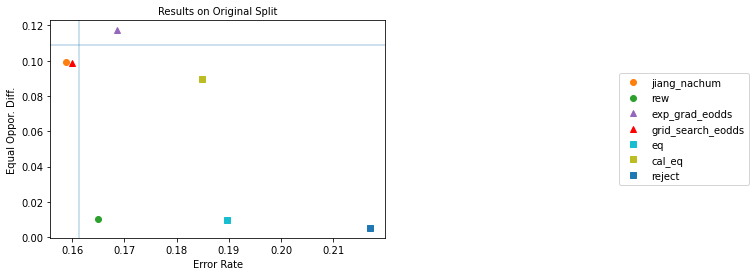

In [5]:
files = results
metric='eod'
axisTitles = {
    'dp': 'Statistical Parity Diff.',
    'eod': 'Equal Oppor. Diff.'
}
# plotLimits = {
#     'synthetic': ([0.05, 0.55], [-0.05, 0.35]),
#     'adult': ([-0.05, 0.55], [-0.05, 0.55]),
#     'bank': ([-0.05, 0.55], [-0.05, 0.55]),
#     'compas': ([-0.05, 0.55], [-0.05, 0.55]),
#     'credit': ([-0.05, 0.55], [-0.05, 0.55])
# }
markers = {
    'base': '+',
    'jiang_nachum': 'o',
    'rew':'o',
    'fairgan':'o',
    'exp_grad_eodds':'^',
    'grid_search_eodds':'^',
    'meta_fair_fdr':'^',
    'prej_remover':'^',
    'gerry_fair': '^',
    'cal_eq':'s',
    'eq':'s',
    'reject':'s'
}
colors = {
    'base': '#1f77b4',
    'jiang_nachum': '#ff7f0e',
    'rew':'#2ca02c',
    'fairgan':'#d62728',
    'exp_grad_eodds':'#9467bd',
    'grid_search_eodds':'#ff0000',
    'meta_fair_fdr':'#8c564b',
    'prej_remover':'#e377c2',
    'gerry_fair': '#7f7f7f',
    'cal_eq':'#bcbd22',
    'eq':'#17becf',
    'reject':'#1f77b4'
}

omitCls = ['base']

plt.figure()
for i in files:
    if i not in omitCls:
        if metric == 'eod':
            plt.errorbar(1 - files[i]['undersample'][f'imbalance_1.0_1.0']['original'].accuracy(), y=abs(files[i]['undersample'][f'imbalance_1.0_1.0']['original'].equal_opportunity_difference()), label=i, fmt=markers[i], color=colors[i])
        elif metric == 'dp':
            plt.errorbar(x = 1 - files[i]['undersample'][f'imbalance_1.0_1.0']['original'].accuracy(), y=abs(files[i]['undersample'][f'imbalance_1.0_1.0']['original'].statistical_parity_difference()), label=i, fmt=markers[i], color=colors[i])
plt.xlabel('Error Rate')
plt.ylabel(axisTitles[metric])
plt.title('Results on Original Split', fontsize=10)
plt.axvline(x=1 - files['base']['undersample'][f'imbalance_1.0_1.0']['original'].accuracy(), alpha=0.3)
plt.axhline(y=abs(files['base']['undersample'][f'imbalance_1.0_1.0']['original'].equal_opportunity_difference()), alpha=0.3)
# Adult
#plt.ylim([0,0.2])
#plt.xlim([0.12,0.2])

# Credit

if dataset == 'credit':
    plt.legend(bbox_to_anchor=(2.1,1.1))
elif dataset == 'adult':
    plt.legend(loc='right', bbox_to_anchor=(2.1,0.5))
elif dataset == 'compas':
    plt.legend(loc='right', bbox_to_anchor=(2,0.5))
elif dataset == 'bank':
    plt.legend(loc='right', bbox_to_anchor=(2,0.5))
elif dataset == 'synthetic':
    plt.legend(loc='right', bbox_to_anchor=(2.1,0.5))
plt.show()

### Effect of Beta on Fairness-Accuracy

#### Effect of Beta Pos

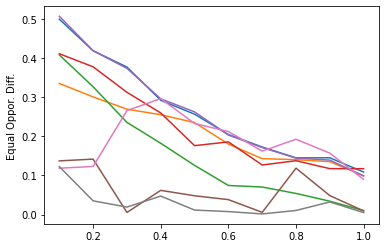

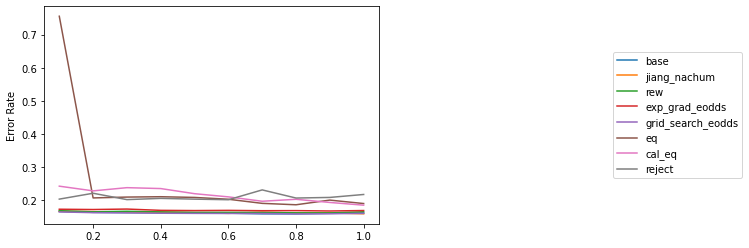

In [15]:
files = results
metric='eod'
axisTitles = {
    'dp': 'Statistical Parity Diff.',
    'eod': 'Equal Oppor. Diff.'
}
markers = {
    'base': '+',
    'jiang_nachum': 'o',
    'rew':'o',
    'fairgan':'o',
    'exp_grad_eodds':'^',
    'grid_search_eodds':'^',
    'meta_fair_fdr':'^',
    'prej_remover':'^',
    'gerry_fair': '^',
    'cal_eq':'s',
    'eq':'s',
    'reject':'s'
}
colors = {
    'base': '#1f77b4',
    'jiang_nachum': '#ff7f0e',
    'rew':'#2ca02c',
    'fairgan':'#d62728',
    'exp_grad_eodds':'#9467bd',
    'grid_search_eodds':'#ff0000',
    'meta_fair_fdr':'#8c564b',
    'prej_remover':'#e377c2',
    'gerry_fair': '#7f7f7f',
    'cal_eq':'#bcbd22',
    'eq':'#17becf',
    'reject':'#1f77b4'
}

omitCls = []
stats = {}
x_axis = [i/10 for i in range(1,11)]
for i in files:
    if i not in omitCls:
        fairness = []
        accuracy = []
        for beta_pos in range(1,11):
            beta_pos /= 10
            if metric == 'eod':
                fairness.append(abs(files[i]['undersample'][f'imbalance_{beta_pos}_1.0']['original'].equal_opportunity_difference()))
            elif metric == 'dp':
                fairness.append(abs(files[i]['undersample'][f'imbalance_{beta_pos}_1.0']['original'].statistical_parity_difference()))
            accuracy.append(1 - files[i]['undersample'][f'imbalance_{beta_pos}_1.0']['original'].accuracy())
        stats[i] = (accuracy, fairness)

plt.figure()
for i in stats:
    plt.plot(x_axis, stats[i][1], label=i)
plt.ylabel(axisTitles[metric])
#plt.ylim([0, 0.2])

plt.figure()
for i in stats:
    plt.plot(x_axis, stats[i][0], label=i)
plt.ylabel('Error Rate')
#plt.ylim([0.12, 0.18])

if dataset == 'credit':
    plt.legend(bbox_to_anchor=(2.1,1.1))
elif dataset == 'adult':
    plt.legend(loc='right', bbox_to_anchor=(2.1,0.5))
elif dataset == 'compas':
    plt.legend(loc='right', bbox_to_anchor=(2,0.5))
elif dataset == 'bank':
    plt.legend(loc='right', bbox_to_anchor=(2,0.5))
elif dataset == 'synthetic':
    plt.legend(loc='right', bbox_to_anchor=(2.1,0.5))
plt.show()

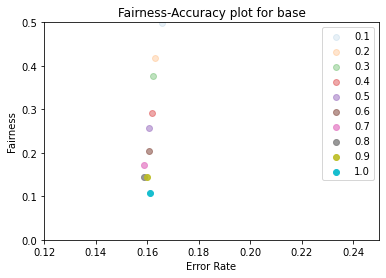

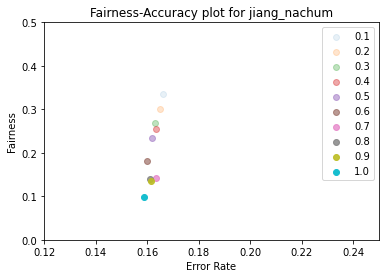

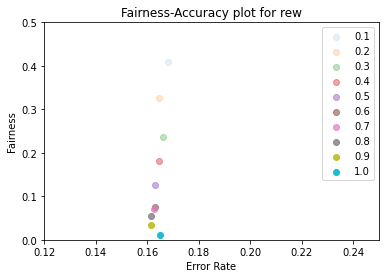

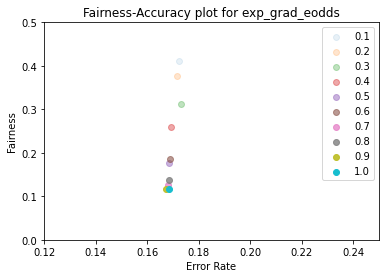

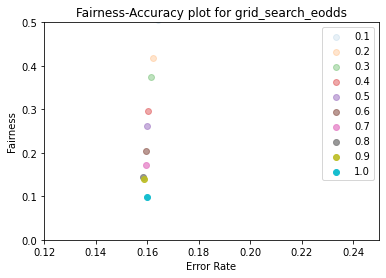

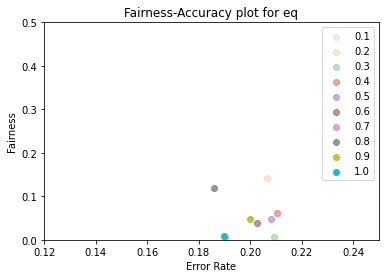

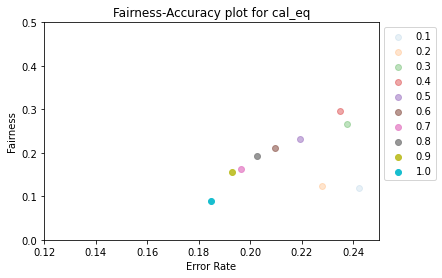

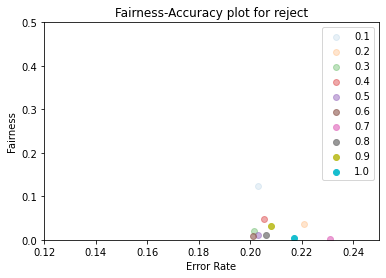

In [17]:
# https://stackoverflow.com/questions/33282368/plotting-a-2d-heatmap
metric = 'eod'
for cls in files:
    accuracy = []
    fairness = []
    betas = []
    for beta_pos in range(1,11):
        beta_pos /= 10
        if metric == 'eod':
            fairness.append(abs(files[cls]['undersample'][f'imbalance_{beta_pos}_1.0']['original'].equal_opportunity_difference()))
        elif metric == 'dp':
            fairness.append(abs(files[cls]['undersample'][f'imbalance_{beta_pos}_1.0']['original'].statistical_parity_difference()))
        accuracy.append(1 - files[cls]['undersample'][f'imbalance_{beta_pos}_1.0']['original'].accuracy())
        betas.append(beta_pos)
    plt.figure()
    for i in range(len(betas)):
        plt.scatter(accuracy[i], fairness[i], label=betas[i], alpha=betas[i])
    plt.xlabel('Error Rate')
    plt.ylabel('Fairness')
    # Adult
    plt.xlim([0.12, 0.25])
    #plt.ylim([0,0.5])
    # Credit
    #plt.xlim([0.15, 0.4])
    plt.ylim([0,0.5])
    plt.title(f'Fairness-Accuracy plot for {cls}')
    plt.legend(bbox_to_anchor=(1,1))

#### Effect of Beta_Neg

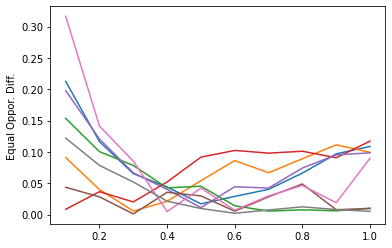

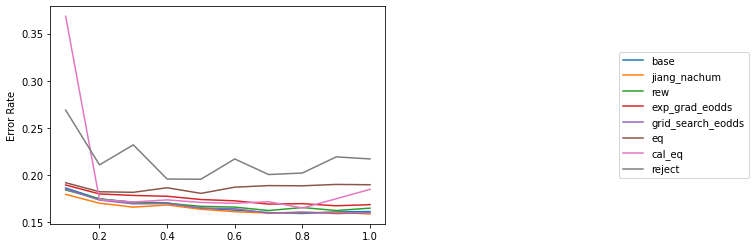

In [18]:
files = results
metric='eod'
axisTitles = {
    'dp': 'Statistical Parity Diff.',
    'eod': 'Equal Oppor. Diff.'
}
markers = {
    'base': '+',
    'jiang_nachum': 'o',
    'rew':'o',
    'fairgan':'o',
    'exp_grad_eodds':'^',
    'grid_search_eodds':'^',
    'meta_fair_fdr':'^',
    'prej_remover':'^',
    'gerry_fair': '^',
    'cal_eq':'s',
    'eq':'s',
    'reject':'s'
}
colors = {
    'base': '#1f77b4',
    'jiang_nachum': '#ff7f0e',
    'rew':'#2ca02c',
    'fairgan':'#d62728',
    'exp_grad_eodds':'#9467bd',
    'grid_search_eodds':'#ff0000',
    'meta_fair_fdr':'#8c564b',
    'prej_remover':'#e377c2',
    'gerry_fair': '#7f7f7f',
    'cal_eq':'#bcbd22',
    'eq':'#17becf',
    'reject':'#1f77b4'
}

omitCls = []
stats = {}
x_axis = [i/10 for i in range(1,11)]
for i in files:
    if i not in omitCls:
        fairness = []
        accuracy = []
        for beta_neg in range(1,11):
            beta_neg /= 10
            if metric == 'eod':
                fairness.append(abs(files[i]['undersample'][f'imbalance_1.0_{beta_neg}']['original'].equal_opportunity_difference()))
            elif metric == 'dp':
                fairness.append(abs(files[i]['undersample'][f'imbalance_1.0_{beta_neg}']['original'].statistical_parity_difference()))
            accuracy.append(1 - files[i]['undersample'][f'imbalance_1.0_{beta_neg}']['original'].accuracy())
        stats[i] = (accuracy, fairness)

plt.figure()
for i in stats:
    plt.plot(x_axis, stats[i][1], label=i)
plt.ylabel(axisTitles[metric])
#plt.ylim([0, 0.5])

plt.figure()
for i in stats:
    plt.plot(x_axis, stats[i][0], label=i)
plt.ylabel('Error Rate')
#plt.ylim([0.12, 0.18])

if dataset == 'credit':
    plt.legend(bbox_to_anchor=(2.1,1.1))
elif dataset == 'adult':
    plt.legend(loc='right', bbox_to_anchor=(2.1,0.5))
elif dataset == 'compas':
    plt.legend(loc='right', bbox_to_anchor=(2,0.5))
elif dataset == 'bank':
    plt.legend(loc='right', bbox_to_anchor=(2,0.5))
elif dataset == 'synthetic':
    plt.legend(loc='right', bbox_to_anchor=(2.1,0.5))
plt.show()

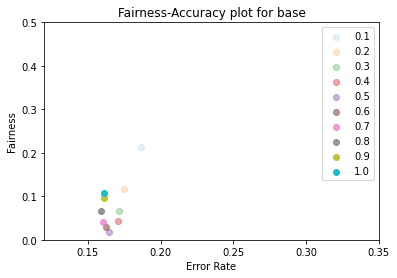

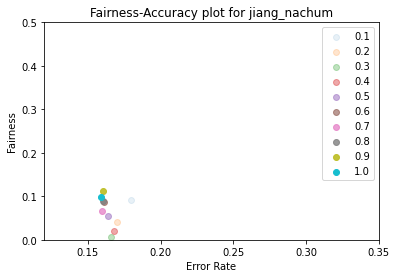

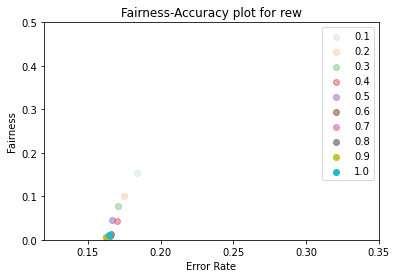

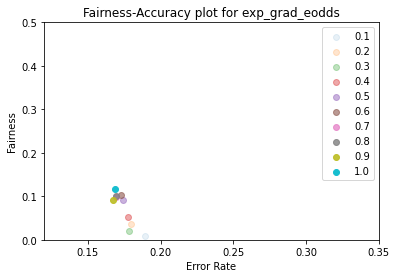

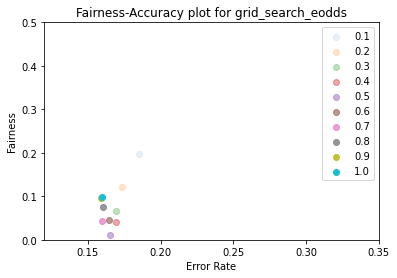

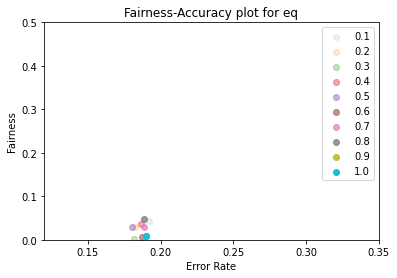

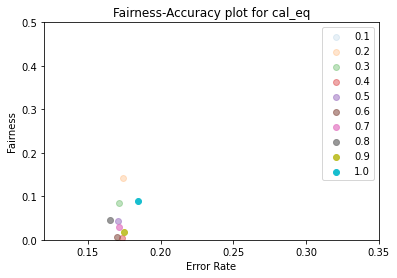

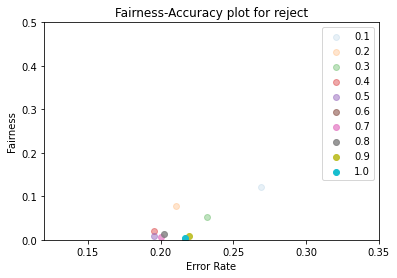

In [19]:
# https://stackoverflow.com/questions/33282368/plotting-a-2d-heatmap
metric = 'eod'
for cls in files:
    accuracy = []
    fairness = []
    betas = []
    for beta_neg in range(1,11):
        beta_neg /= 10
        if metric == 'eod':
            fairness.append(abs(files[cls]['undersample'][f'imbalance_1.0_{beta_neg}']['original'].equal_opportunity_difference()))
        elif metric == 'dp':
            fairness.append(abs(files[cls]['undersample'][f'imbalance_1.0_{beta_neg}']['original'].statistical_parity_difference()))
        accuracy.append(1 - files[cls]['undersample'][f'imbalance_1.0_{beta_neg}']['original'].accuracy())
        betas.append(beta_neg)
    plt.figure()
    for i in range(len(betas)):
        plt.scatter(accuracy[i], fairness[i], label=betas[i], alpha=betas[i])
    plt.xlabel('Error Rate')
    plt.ylabel('Fairness')
    # Adult
    plt.xlim([0.12, 0.35])
    plt.ylim([0,0.5])
    # Credit
    #plt.xlim([0.15, 0.4])
    plt.title(f'Fairness-Accuracy plot for {cls}')
    plt.legend(bbox_to_anchor=(1,1))

#### Effect of Label Bias

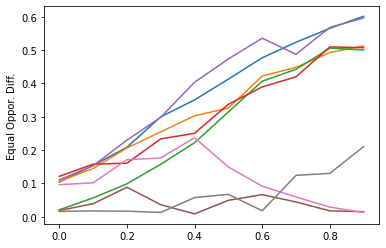

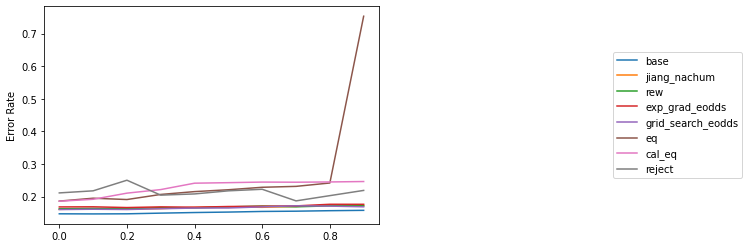

In [20]:
files = results
metric='eod'
axisTitles = {
    'dp': 'Statistical Parity Diff.',
    'eod': 'Equal Oppor. Diff.'
}
markers = {
    'base': '+',
    'jiang_nachum': 'o',
    'rew':'o',
    'fairgan':'o',
    'exp_grad_eodds':'^',
    'grid_search_eodds':'^',
    'meta_fair_fdr':'^',
    'prej_remover':'^',
    'gerry_fair': '^',
    'cal_eq':'s',
    'eq':'s',
    'reject':'s'
}
colors = {
    'base': '#1f77b4',
    'jiang_nachum': '#ff7f0e',
    'rew':'#2ca02c',
    'fairgan':'#d62728',
    'exp_grad_eodds':'#9467bd',
    'grid_search_eodds':'#ff0000',
    'meta_fair_fdr':'#8c564b',
    'prej_remover':'#e377c2',
    'gerry_fair': '#7f7f7f',
    'cal_eq':'#bcbd22',
    'eq':'#17becf',
    'reject':'#1f77b4'
}

omitCls = []
stats = {}
x_axis = [i/10 for i in range(0,10)]
for i in files:
    if i not in omitCls:
        fairness = []
        accuracy = []
        for label_bias in range(0,10):
            label_bias /= 10
            if metric == 'eod':
                fairness.append(abs(files[i]['label_bias'][f'imbalance_{label_bias}']['original'].equal_opportunity_difference()))
            elif metric == 'dp':
                fairness.append(abs(files[i]['label_bias'][f'imbalance_{label_bias}']['original'].statistical_parity_difference()))
            accuracy.append(1 - files[i]['label_bias'][f'imbalance_{label_bias}']['original'].accuracy())
        stats[i] = (accuracy, fairness)

plt.figure()
for i in stats:
    plt.plot(x_axis, stats[i][1], label=i)
plt.ylabel(axisTitles[metric])
#plt.ylim([0, 1])

plt.figure()
for i in stats:
    plt.plot(x_axis, stats[i][0], label=i)
plt.ylabel('Error Rate')
#plt.ylim([0.12, 0.18])

if dataset == 'credit':
    plt.legend(bbox_to_anchor=(2.1,1.1))
elif dataset == 'adult':
    plt.legend(loc='right', bbox_to_anchor=(2.1,0.5))
elif dataset == 'compas':
    plt.legend(loc='right', bbox_to_anchor=(2,0.5))
elif dataset == 'bank':
    plt.legend(loc='right', bbox_to_anchor=(2,0.5))
elif dataset == 'synthetic':
    plt.legend(loc='right', bbox_to_anchor=(2.1,0.5))
plt.show()

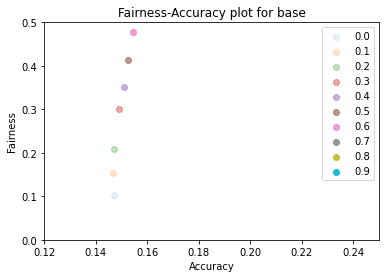

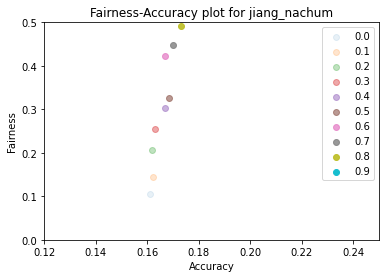

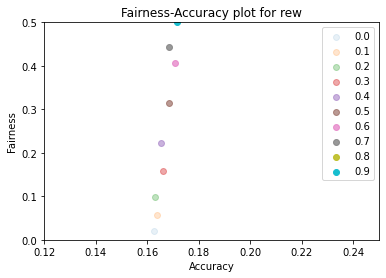

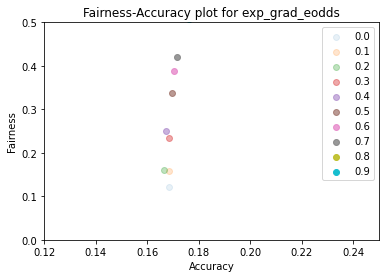

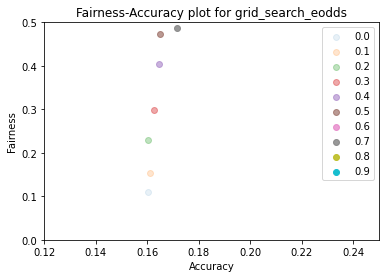

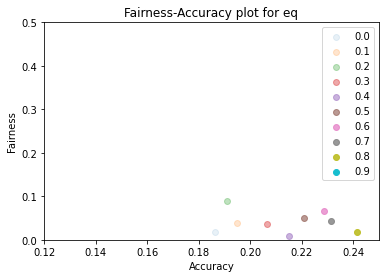

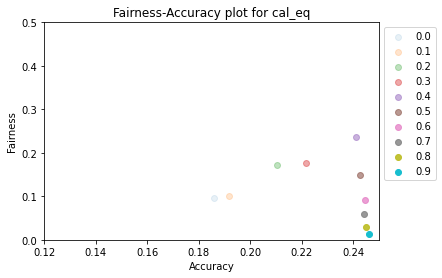

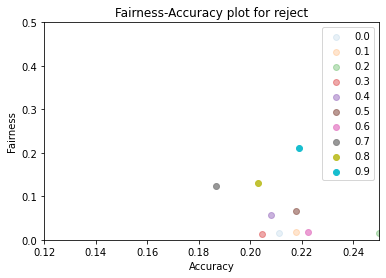

In [21]:
# https://stackoverflow.com/questions/33282368/plotting-a-2d-heatmap
metric = 'eod'
for cls in files:
    accuracy = []
    fairness = []
    betas = []
    for label_bias in range(0,10):
        label_bias /= 10
        if metric == 'eod':
            fairness.append(abs(files[cls]['label_bias'][f'imbalance_{label_bias}']['original'].equal_opportunity_difference()))
        elif metric == 'dp':
            fairness.append(abs(files[cls]['label_bias'][f'imbalance_{label_bias}']['original'].statistical_parity_difference()))
        accuracy.append(1 - files[cls]['label_bias'][f'imbalance_{label_bias}']['original'].accuracy())
        betas.append(label_bias)
    plt.figure()
    for i in range(len(betas)):
        plt.scatter(accuracy[i], fairness[i], label=betas[i], alpha=betas[i]+0.1)
    plt.xlabel('Accuracy')
    plt.ylabel('Fairness')
    # Adult
    plt.xlim([0.12, 0.25])
    plt.ylim([0,0.5])
    
    # Credit
    #plt.xlim([0.15, 0.5])
    plt.title(f'Fairness-Accuracy plot for {cls}')
    plt.legend(bbox_to_anchor=(1,1))

#### Beta_pos-Beta_Neg Heatmap

In [22]:
import numpy as np
import seaborn as sns

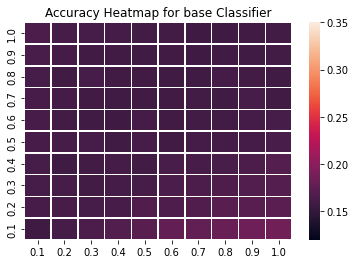

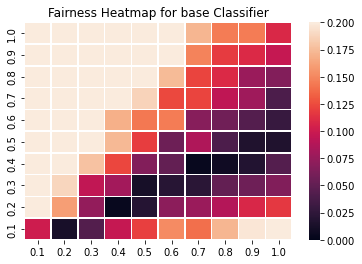

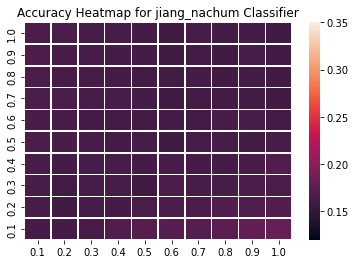

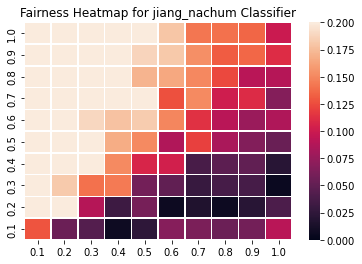

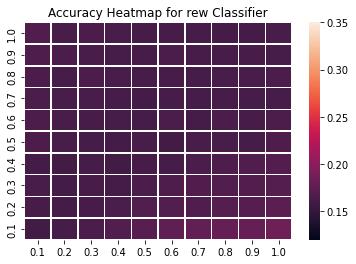

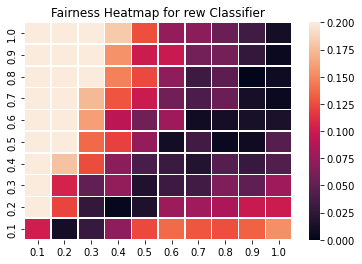

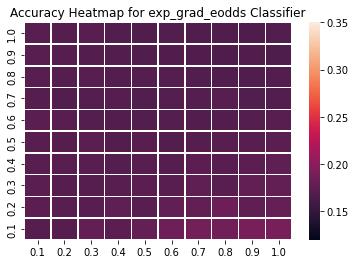

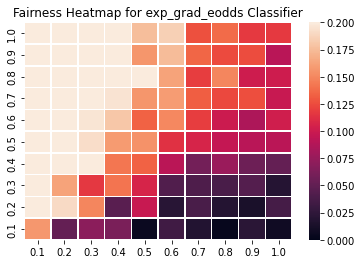

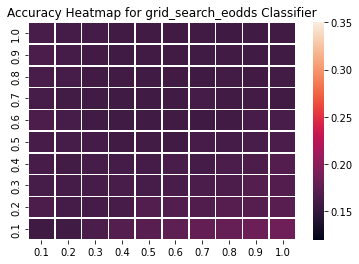

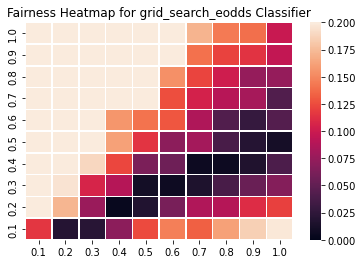

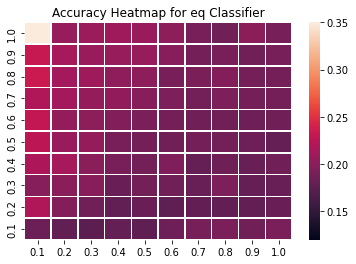

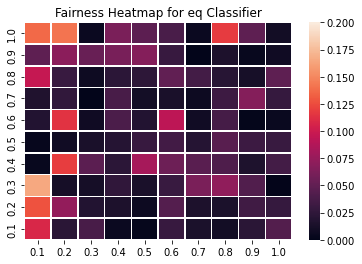

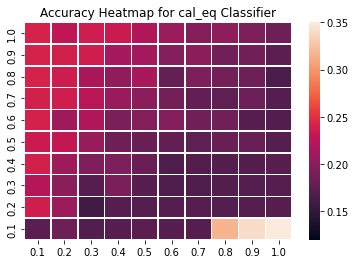

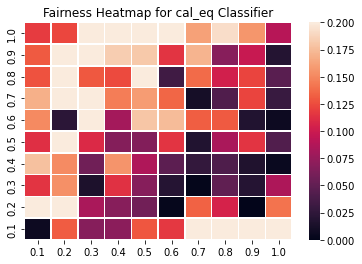

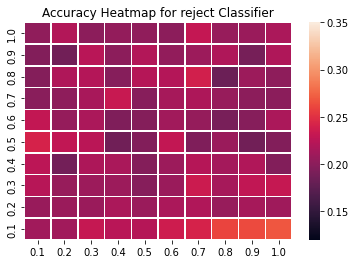

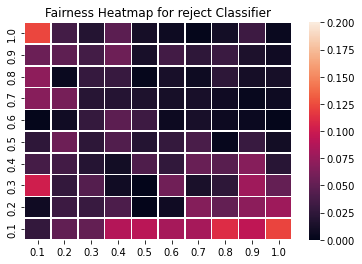

In [13]:
# https://stackoverflow.com/questions/33282368/plotting-a-2d-heatmap
metric = 'eod'
for cls in files:
    acc_data = np.zeros((10,10))
    fairness_data = np.zeros((10,10))
    for beta_pos in range(1,11):
        for beta_neg in range(10,0,-1):
            try:
                acc_data[beta_neg - 1][beta_pos - 1] = 1 - files[cls]['undersample'][f'imbalance_{beta_pos/10}_{(11 - beta_neg)/10}']['original'].accuracy()
                if metric == 'eod':
                    fairness_data[beta_neg - 1][beta_pos - 1] = abs(files[cls]['undersample'][f'imbalance_{beta_pos/10}_{(11 - beta_neg)/10}']['original'].equal_opportunity_difference())
                elif metric == 'dp':
                    fairness_data[beta_neg - 1][beta_pos - 1] = abs(files[cls]['undersample'][f'imbalance_{beta_pos/10}_{(11 - beta_neg)/10}']['original'].statistical_parity_difference())
            except KeyError as e:
                continue
    plt.figure()
    plt.title(f'Accuracy Heatmap for {cls} Classifier')
    data_df = pd.DataFrame(acc_data, index=[(11 - i)/10 for i in range(1,11)], columns=[i/10 for i in range(1,11)])
    ax = sns.heatmap(data_df, linewidth=0.5, vmin=0.12, vmax=0.35)
    plt.show()
    plt.figure()
    plt.title(f'Fairness Heatmap for {cls} Classifier')
    data_df = pd.DataFrame(fairness_data, index=[(11 - i)/10 for i in range(1,11)], columns=[i/10 for i in range(1,11)])
    ax = sns.heatmap(data_df, linewidth=0.5, vmin=0, vmax=0.2)
    plt.show()